Instal/Import Library

In [1]:
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np

## Scraping Data

In [3]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.gojek.app',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=50000,
    filter_score_with=None)

In [4]:
df_baru = pd.DataFrame(np.array(result),columns=['review'])
df_baru = df_baru.join(pd.DataFrame(df_baru.pop('review').tolist()))
df_baru.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,2422c8e3-0a5a-4a4f-b93b-ee33f553c5c2,dad bas,https://play-lh.googleusercontent.com/a/AAcHTt...,"kode otp gak masuk masuk, udah update terbaru,...",1,6,4.68.1,2023-06-15 13:06:57,"Hai, mohon maaf atas kendalanya. Ketika masuk ...",2023-06-16 02:54:45,4.68.1
1,0009a5a4-4011-4fb7-aaf9-7a110758b4b1,Ayu Puspita,https://play-lh.googleusercontent.com/a/AAcHTt...,Dulu: Banyak bonus. Bisa pesan lintas kota. ku...,5,143,4.68.1,2023-06-10 03:28:34,None,NaT,4.68.1
2,0cf644a0-77f4-4e7b-9f4b-97104e5cb16b,Linda Soebiyanto,https://play-lh.googleusercontent.com/a-/AD_cM...,"Driver2nya bs antar dg tepat, ga bingung arah ...",5,147,4.67.2,2023-06-09 04:20:44,None,NaT,4.67.2
3,0803ba40-a62d-49aa-86ed-96a570b7fc0a,Febrie G. Setiaputra,https://play-lh.googleusercontent.com/a-/AD_cM...,Akan lebih baik jika lokasi tidak disetting ot...,2,471,4.67.2,2023-05-24 01:46:25,"Hai Febrie G, mohon maaf ya. Laporan yang kamu...",2023-05-25 04:51:46,4.67.2
4,fdf926be-e84c-4f33-9f66-463a9fc6ac99,Nur Zaman,https://play-lh.googleusercontent.com/a/AAcHTt...,Performa makin lama makin menurun dan harga yg...,1,198,4.67.2,2023-06-04 08:58:48,"Hai Nur, terima kasih atas ulasanmu dan mohon ...",2023-06-06 05:28:30,4.67.2


In [5]:
len(df_baru.index)

50000

In [6]:
df_baru[['score','content']].head()

,score,content
0,1,"kode otp gak masuk masuk, udah update terbaru,..."
1,5,Dulu: Banyak bonus. Bisa pesan lintas kota. ku...
2,5,"Driver2nya bs antar dg tepat, ga bingung arah ..."
3,2,Akan lebih baik jika lokasi tidak disetting ot...
4,1,Performa makin lama makin menurun dan harga yg...


In [7]:
new_df = df_baru[['score','content']]
new_df.head()

,score,content
0,1,"kode otp gak masuk masuk, udah update terbaru,..."
1,5,Dulu: Banyak bonus. Bisa pesan lintas kota. ku...
2,5,"Driver2nya bs antar dg tepat, ga bingung arah ..."
3,2,Akan lebih baik jika lokasi tidak disetting ot...
4,1,Performa makin lama makin menurun dan harga yg...


Pelabelan

In [8]:
def labelling(score):
  if score < 3:
    return 'Negatif'
  elif score == 4 :
    return 'Positif'
  elif score == 5 :
    return 'Positif'
new_df['Label'] = new_df ['score'].apply(labelling)
new_df.head(50)

<ipython-input-8-cde5f2fd1ec4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Label'] = new_df ['score'].apply(labelling)


,score,content,Label
0,1,"kode otp gak masuk masuk, udah update terbaru,...",Negatif
1,5,Dulu: Banyak bonus. Bisa pesan lintas kota. ku...,Positif
2,5,"Driver2nya bs antar dg tepat, ga bingung arah ...",Positif
3,2,Akan lebih baik jika lokasi tidak disetting ot...,Negatif
4,1,Performa makin lama makin menurun dan harga yg...,Negatif
5,1,Aplikasi tokai. Makin lama makin menurun perfo...,Negatif
6,1,"Pemesanan go-food kurang memuaskan,sistem kupo...",Negatif
7,2,Untuk gofood Kenapa driver yang dipilih itu bu...,Negatif
8,5,Semakin Update versi semakin memperbanyak Pera...,Positif
9,3,Ini terkait pesanan di online store yg belum d...,None


In [9]:
new_df = new_df[['content', 'Label']]

In [10]:
new_df.head()

,content,Label
0,"kode otp gak masuk masuk, udah update terbaru,...",Negatif
1,Dulu: Banyak bonus. Bisa pesan lintas kota. ku...,Positif
2,"Driver2nya bs antar dg tepat, ga bingung arah ...",Positif
3,Akan lebih baik jika lokasi tidak disetting ot...,Negatif
4,Performa makin lama makin menurun dan harga yg...,Negatif


## Data Cleaning

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  50000 non-null  object
 1   Label    44917 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [12]:
new_df.isna()

,content,Label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
49995,False,False
49996,False,False
49997,False,True
49998,False,False


In [13]:
new_df.isna().any()

content    False
Label       True
dtype: bool

In [14]:
new_df.isnull().sum()

content       0
Label      5083
dtype: int64

In [15]:
new_df.dropna(subset=['Label'],inplace = True)

In [16]:
new_df.isnull().sum()

content    0
Label      0
dtype: int64

In [17]:
new_df.head(50)

,content,Label
0,"kode otp gak masuk masuk, udah update terbaru,...",Negatif
1,Dulu: Banyak bonus. Bisa pesan lintas kota. ku...,Positif
2,"Driver2nya bs antar dg tepat, ga bingung arah ...",Positif
3,Akan lebih baik jika lokasi tidak disetting ot...,Negatif
4,Performa makin lama makin menurun dan harga yg...,Negatif
5,Aplikasi tokai. Makin lama makin menurun perfo...,Negatif
6,"Pemesanan go-food kurang memuaskan,sistem kupo...",Negatif
7,Untuk gofood Kenapa driver yang dipilih itu bu...,Negatif
8,Semakin Update versi semakin memperbanyak Pera...,Positif
10,Sistem upgrade plus yg sangat buruk. Cuma bisa...,Negatif


In [18]:
new_df.to_csv("data_review_gojek_apps.csv", index = False)  #simpan hasil file data cleaning

In [19]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

from numpy import array
from sklearn.model_selection import train_test_split

from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [20]:
data = pd.read_csv('/content/data_review_gojek_apps.csv')
data.head(50)

,content,Label
0,"kode otp gak masuk masuk, udah update terbaru,...",Negatif
1,Dulu: Banyak bonus. Bisa pesan lintas kota. ku...,Positif
2,"Driver2nya bs antar dg tepat, ga bingung arah ...",Positif
3,Akan lebih baik jika lokasi tidak disetting ot...,Negatif
4,Performa makin lama makin menurun dan harga yg...,Negatif
5,Aplikasi tokai. Makin lama makin menurun perfo...,Negatif
6,"Pemesanan go-food kurang memuaskan,sistem kupo...",Negatif
7,Untuk gofood Kenapa driver yang dipilih itu bu...,Negatif
8,Semakin Update versi semakin memperbanyak Pera...,Positif
9,Sistem upgrade plus yg sangat buruk. Cuma bisa...,Negatif


In [21]:
# convert label

y = [ 0 if i=='Negatif' else 1 for i in data['Label']]
x = data['content']
print(x[:5], y[:5])

0    kode otp gak masuk masuk, udah update terbaru,...
1    Dulu: Banyak bonus. Bisa pesan lintas kota. ku...
2    Driver2nya bs antar dg tepat, ga bingung arah ...
3    Akan lebih baik jika lokasi tidak disetting ot...
4    Performa makin lama makin menurun dan harga yg...
Name: content, dtype: object [0, 1, 1, 0, 0]


In [22]:
# split data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [23]:
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[   0 8545]
 [   1 4931]]


## model configuration

In [24]:
vocab_size = 200000
embedding_dim = 16
max_length = 20
trunc_type ='post'
padding_type='post'
oov_tok = "<OOV>"

In [25]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x)

sekuens_train = tokenizer.texts_to_sequences(X_train)
sekuens_test = tokenizer.texts_to_sequences(X_test)

padded_train = pad_sequences(sekuens_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
padded_test = pad_sequences(sekuens_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

padded_train = np.array(padded_train)
label_train = np.array(y_train)

padded_test = np.array(padded_test)
label_test = np.array(y_test)

In [26]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
history = model.fit(padded_train, label_train, epochs=20,
                    batch_size=32, validation_data=(padded_test, label_test),
                    steps_per_epoch=10, verbose=2)

Epoch 1/20
10/10 - 13s - loss: 0.6908 - accuracy: 0.5875 - val_loss: 0.6859 - val_accuracy: 0.6341 - 13s/epoch - 1s/step
Epoch 2/20
10/10 - 3s - loss: 0.6773 - accuracy: 0.6125 - val_loss: 0.6610 - val_accuracy: 0.6341 - 3s/epoch - 252ms/step
Epoch 3/20
10/10 - 2s - loss: 0.6724 - accuracy: 0.5875 - val_loss: 0.6314 - val_accuracy: 0.6341 - 2s/epoch - 212ms/step
Epoch 4/20
10/10 - 3s - loss: 0.6072 - accuracy: 0.6750 - val_loss: 0.5997 - val_accuracy: 0.6475 - 3s/epoch - 254ms/step
Epoch 5/20
10/10 - 2s - loss: 0.5670 - accuracy: 0.7031 - val_loss: 0.5563 - val_accuracy: 0.7079 - 2s/epoch - 206ms/step
Epoch 6/20
10/10 - 3s - loss: 0.4712 - accuracy: 0.7781 - val_loss: 0.5155 - val_accuracy: 0.7845 - 3s/epoch - 273ms/step
Epoch 7/20
10/10 - 2s - loss: 0.5153 - accuracy: 0.7781 - val_loss: 0.5043 - val_accuracy: 0.7816 - 2s/epoch - 192ms/step
Epoch 8/20
10/10 - 1s - loss: 0.4553 - accuracy: 0.8094 - val_loss: 0.4162 - val_accuracy: 0.8281 - 1s/epoch - 149ms/step
Epoch 9/20
10/10 - 2s - l

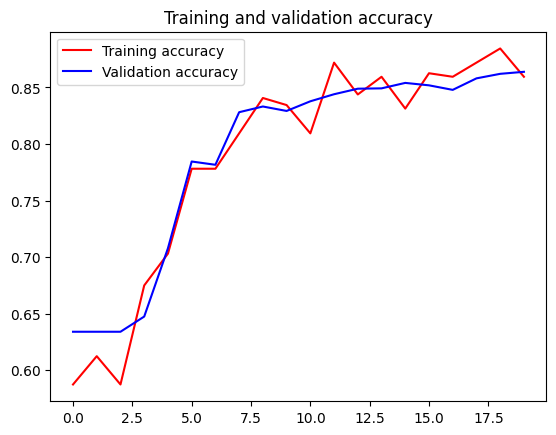

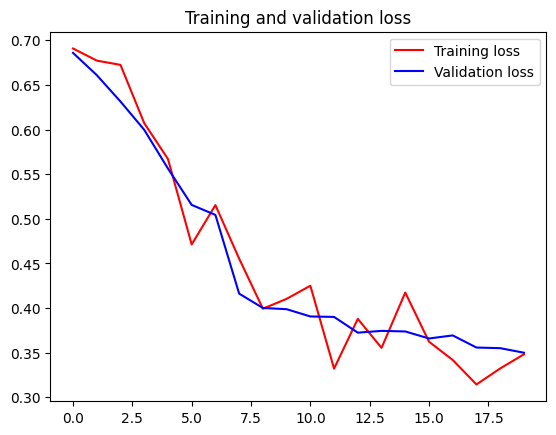

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Confusion Matrix

In [29]:
y_pred = np.rint(model.predict(padded_test))
y_pred

422/422 [==============================] - 1s 2ms/step


array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [30]:
cm = tf.math.confusion_matrix(labels=label_test, predictions=y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[8123,  422],
       [1414, 3517]], dtype=int32)>

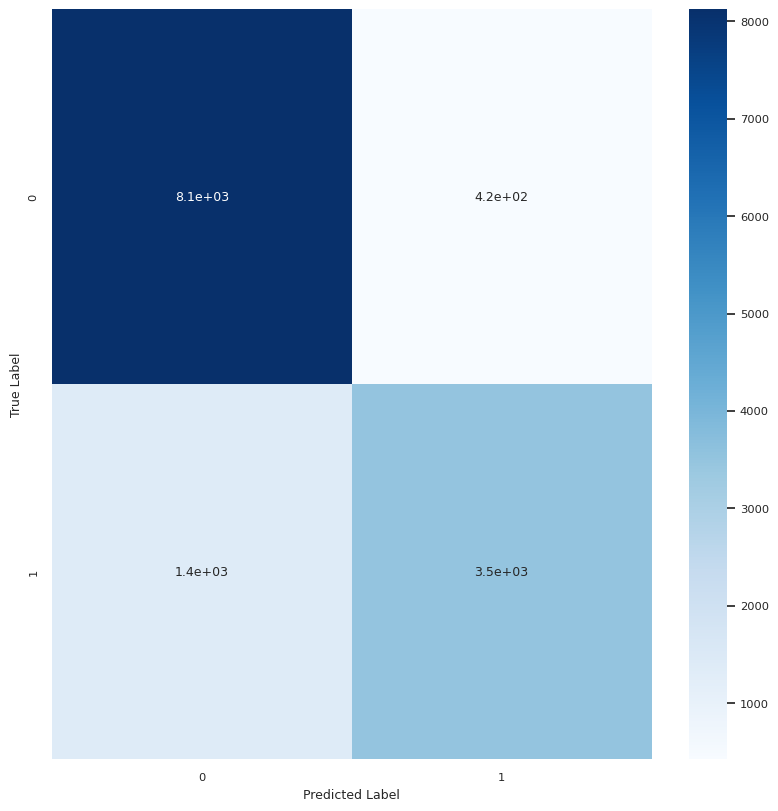

In [51]:
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
ax = plt.subplot()
data = np.asarray(cm).reshape(2,2)

sns.heatmap(data, annot=True, cmap=plt.cm.Blues, ax=ax)
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Pengujian Sentimen Menggunakan Model

In [50]:
# test sentimen
sentence = ['gojek sangat membantu dan sangat bermanfaat']
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(np.rint(model.predict(padded)))

1/1 [==============================] - 0s 34ms/step
[[1.]]
